In [14]:
import numpy as np
import matplotlib.pyplot as plt
import adaptive_latents
from adaptive_latents import proSVD, CenteringTransformer, Pipeline
from datasets import Naumann24uDataset

rng = np.random.default_rng()


In [15]:
d = Naumann24uDataset(Naumann24uDataset.sub_datasets[2])

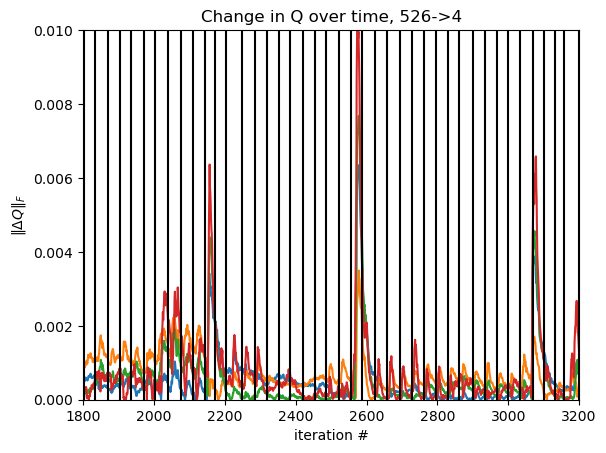

In [16]:
in_data = d.C.T

diff_over_time ={
    'over_whole_matrix'       : lambda Qs: (np.linalg.norm(np.diff(Qs, axis=0),axis=(1,2))), 
    'along_axis': lambda Qs: (np.linalg.norm(np.diff(Qs, axis=0),axis=1))
}.get('along_axis')

# prosvd_with_Q_args = dict(output_d=4, init_size=10, pro_arguments=dict(centering=False))

fig, ax = plt.subplots(); ax: plt.Axes

pro = proSVD(k=4, log_level=1)
p = Pipeline([
    CenteringTransformer(),
    pro,
])

p.offline_run_on(in_data)


plt.plot(pro.log['t'][1:], diff_over_time(pro.log['Q']), label='original data')


for time in d.stimulations['sample']:
    plt.axvline(time, color='k')
plt.xlim([1800, 3200])
plt.ylim([0, 0.01])

plt.title(f"Change in Q over time, {pro.Q.shape[0]}->{pro.k}")
plt.xlabel("iteration #")
plt.ylabel(r"$\Vert\Delta Q \Vert_F$");
# plt.legend();


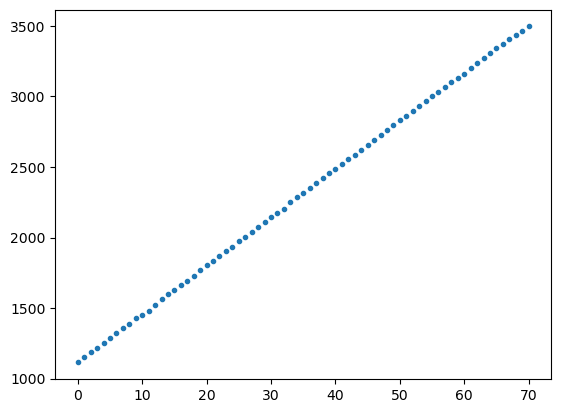

In [17]:
d = Naumann24uDataset(Naumann24uDataset.sub_datasets[2])
plt.plot(d.stimulations['sample'], '.')

In [18]:
d.stimulations

,sample,target_neuron
0,1114.0,245.0
1,1153.0,245.0
2,1187.0,245.0
3,1219.0,245.0
4,1255.0,245.0
...,...,...
66,3371.0,213.0
67,3408.0,213.0
68,3437.0,213.0
69,3461.0,213.0


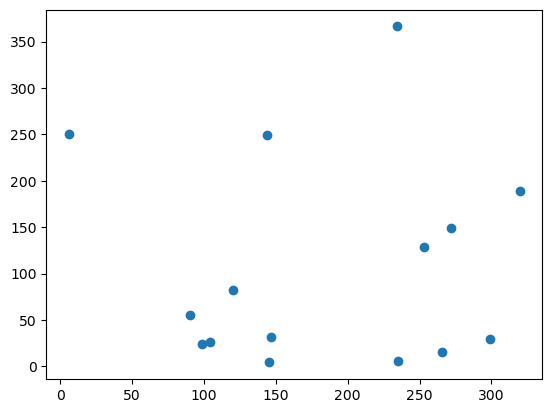

In [19]:
plt.scatter(d.neuron_df['x'], d.neuron_df['y'])